<strong><h3>Sentiment analysis using SVM
</h3></strong>

In [10]:
import string 
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score ,  confusion_matrix
from sklearn.svm import SVC
 

In [11]:
df = pd.read_csv("Customer review datset/Corona_NLP_train.csv" , encoding = 'ISO-8859-1')
df = df.drop(columns= ['ScreenName' , 'Location' , 'TweetAt'])
df.sample(5)

,UserName,OriginalTweet,Sentiment
37166,40965,@HuaweiÂ Technologies Co said on Thursday that...,Neutral
16890,20689,Business offers online shopping alternative fo...,Neutral
38,3837,my wife works retail&amp;a customer came in ye...,Negative
40269,44068,It s all anyone is talking about at the moment...,Neutral
19958,23757,Covid-19: Prices of foodstuff skyrocket in Kad...,Neutral


In [12]:
df.isnull().sum()

UserName         0
OriginalTweet    0
Sentiment        0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(41157, 3)

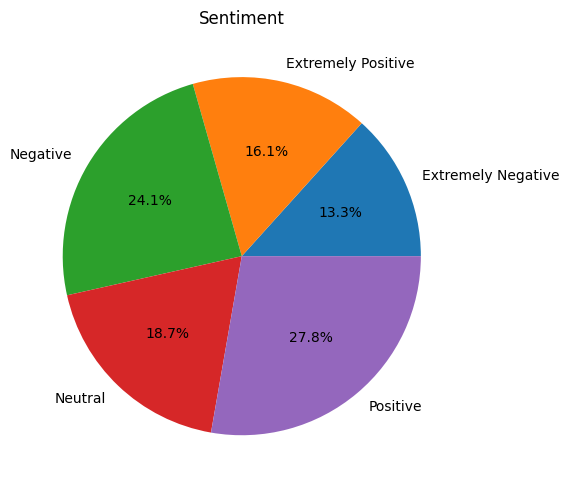

In [15]:
# EDA
plt.figure(figsize=(10 ,5 ))
df.groupby('Sentiment').size().plot(kind="pie" , autopct = "%1.1f%%" )
plt.title("Sentiment")
plt.tight_layout()

In [17]:
# Data preprocessing of text data
import re
lem = WordNetLemmatizer() 
stop_words = set(stopwords.words('english'))

def preprocessing(text):
    text = text.lower() # Lowercase the word

    # lemmatization , stop words removal and punctuation removal
    filter_words = [lem.lemmatize(word) for word in text.split() if word not in stop_words and word not in string.punctuation] 

    filter_word_final = [word for word in filter_words if word.isalnum()] # removing spcial chracter
   
    return " ".join(filter_word_final)

df['OriginalTweet'] = df['OriginalTweet'].apply(preprocessing)

In [18]:
wc = WordCloud(width = 750 , height = 750 , min_font_size = 10 , background_color = 'white')
wc_neg = WordCloud(width = 750 , height = 750 , min_font_size = 10 , background_color = 'white')

wc_positive = wc.generate(df[df['Sentiment'] == "Positive"]['OriginalTweet'].str.cat(sep = " "))
wc_negative = wc_neg.generate(df[df['Sentiment'] == "Negative"]['OriginalTweet'].str.cat(sep = " "))

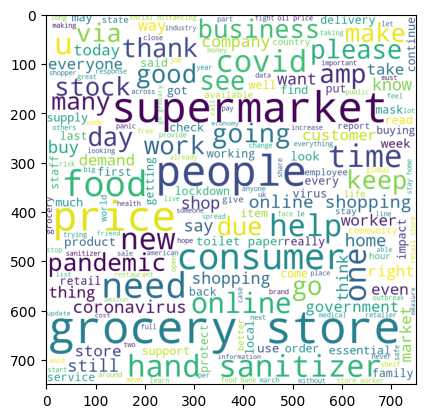

In [19]:
# positive sentiment wordcloud 
plt.imshow(wc_positive) 

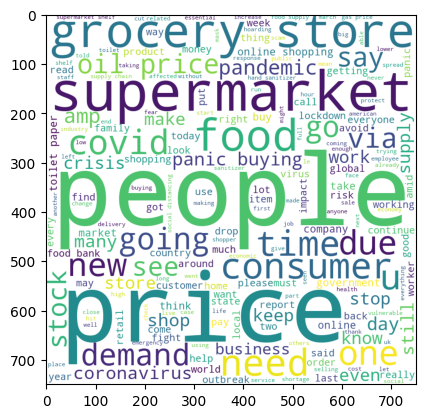

In [20]:
# Negative sentiment wordcloud 
plt.imshow(wc_negative) 

In [21]:
# Split label and sample

X = df['OriginalTweet']
y = df['Sentiment']

X_train , X_test , y_train, y_test = train_test_split(X , y , test_size= 0.2 , random_state= 42)

In [22]:
# label encoder 
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [23]:
# Vectorisation of input text

tf_idf = TfidfVectorizer()

X_train =tf_idf.fit_transform(X_train)
X_test = tf_idf.transform(X_test)

In [24]:
X_train.shape , X_test.shape
accuuray = []
precision = []


In [25]:
svc =SVC(kernel= "sigmoid")

svc.fit(X_train , y_train)
y_pred = svc.predict(X_test)

print(accuracy_score(y_test , y_pred))
print(precision_score(y_test , y_pred, average= "weighted"))
accuuray.append(accuracy_score(y_test , y_pred))
precision.append(precision_score(y_test , y_pred, average= "weighted"))


0.5675413022351797
0.5750079701291844


In [26]:
# Split label and sample
X = df['OriginalTweet']
y = df['Sentiment']

X_train , X_test , y_train, y_test = train_test_split(X , y , test_size= 0.2 , random_state= 42)

# label encoder 
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Vectorisation of input text with uni and bigram

tf_idf_ngram = TfidfVectorizer(ngram_range=(1,2) , max_features=20000)

X_train =tf_idf_ngram.fit_transform(X_train)
X_test = tf_idf_ngram.transform(X_test)

svc =SVC(kernel= "sigmoid")

svc.fit(X_train , y_train)
y_pred = svc.predict(X_test)

print(accuracy_score(y_test , y_pred))
print(precision_score(y_test , y_pred, average= "weighted"))
accuuray.append(accuracy_score(y_test , y_pred))
precision.append(precision_score(y_test , y_pred, average= "weighted"))


0.5666909620991254
0.5745939360861763


In [27]:
# Split label and sample
X = df['OriginalTweet']
y = df['Sentiment']

X_train , X_test , y_train, y_test = train_test_split(X , y , test_size= 0.2 , random_state= 42)

# label encoder 
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Vectorisation of CountVectorizer 

cv = CountVectorizer()

X_train =cv.fit_transform(X_train)
X_test = cv.transform(X_test)

svc =SVC(kernel= "sigmoid")

svc.fit(X_train , y_train)
y_pred = svc.predict(X_test)

print(accuracy_score(y_test , y_pred))
print(precision_score(y_test , y_pred, average= "weighted"))
accuuray.append(accuracy_score(y_test , y_pred))
precision.append(precision_score(y_test , y_pred, average= "weighted"))


0.5733722060252673
0.5821150074262541


In [28]:
# Split label and sample
X = df['OriginalTweet']
y = df['Sentiment']

X_train , X_test , y_train, y_test = train_test_split(X , y , test_size= 0.2 , random_state= 42)

# label encoder 
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Vectorisation of input text with CountVectorizer( uni and bigram )

cv_ngram = CountVectorizer(ngram_range=(1,2) , max_features=20000)

X_train =cv_ngram.fit_transform(X_train)
X_test = cv_ngram.transform(X_test)

svc =SVC(kernel= "sigmoid")

svc.fit(X_train , y_train)
y_pred = svc.predict(X_test)

print(accuracy_score(y_test , y_pred))
print(precision_score(y_test , y_pred, average= "weighted"))
accuuray.append(accuracy_score(y_test , y_pred))
precision.append(precision_score(y_test , y_pred, average= "weighted"))


0.5688775510204082
0.5805518768930238


In [37]:

algo = ['tf-idf' , 'tf-idf(n-gram)' , 'one hot encoding' , "one hot encoding (ngram)" , "NB"]
evaluation = pd.DataFrame({"Vectorization technique" : algo, "Accuracy" : accuuray , "Precision" : precision }).sort_values(by = "Precision" , ascending= False)

print(evaluation)

    Vectorization technique  Accuracy  Precision
2          one hot encoding  0.573372   0.582115
3  one hot encoding (ngram)  0.568878   0.580552
0                    tf-idf  0.567541   0.575008
1            tf-idf(n-gram)  0.566691   0.574594
4                        NB  0.464286   0.496815


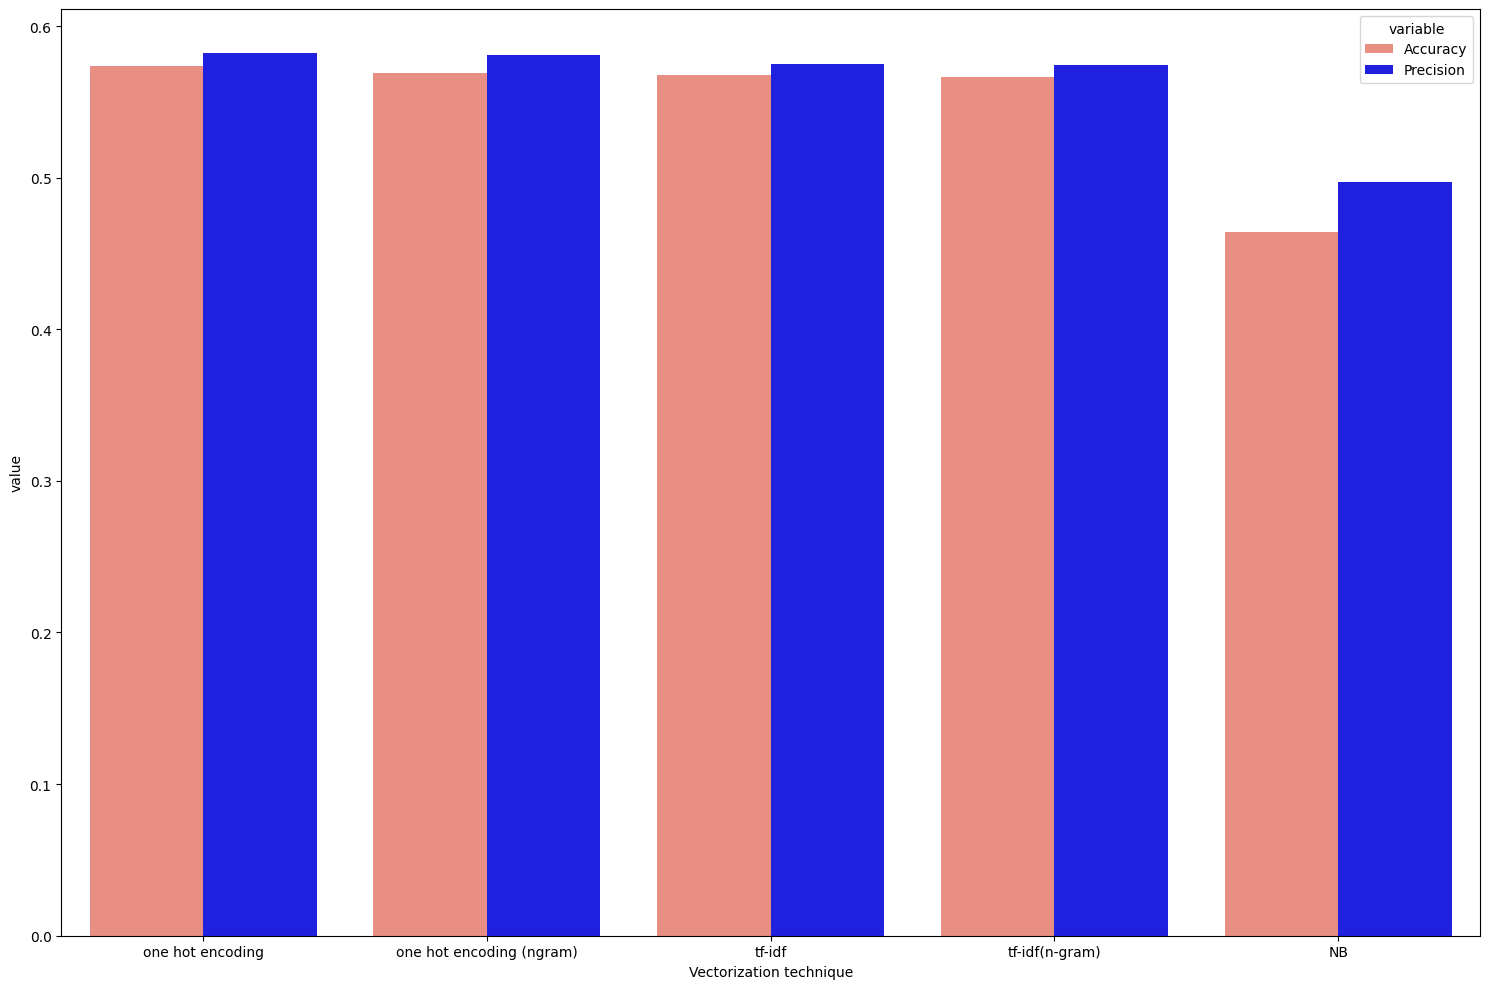

In [40]:
sub = plt.subplots(figsize = (15 , 10))

sns.barplot(x= 'Vectorization technique' , y= 'value' , hue = 'variable',
            data = evaluation.melt(id_vars= 'Vectorization technique') , palette=('salmon' , 'blue'))
plt.tight_layout()
plt.show()